Analysing and visualizing data from pumpkin.csv

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

In [30]:
pumpkins = pd.read_csv('pumpkin.csv')
pumpkins.head(5)

,City Name,Type,Package,Variety,Sub Variety,Grade,Date,Low Price,High Price,Mostly Low,...,Unit of Sale,Quality,Condition,Appearance,Storage,Crop,Repack,Trans Mode,Unnamed: 24,Unnamed: 25
0,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,4/29/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
1,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,5/6/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
2,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
3,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
4,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,11/5/16,90.0,100.0,90.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN


We use the pandas library to read the csv file and store it into a variable 'pumpkins'. As you can see the, the table prints out the first 5 rows of the table.

In [31]:
# Checking for missing datas
pumpkins.isnull().sum()

City Name             0
Type               1712
Package               0
Variety               5
Sub Variety        1461
Grade              1757
Date                  0
Low Price             0
High Price            0
Mostly Low          103
Mostly High         103
Origin                3
Origin District    1626
Item Size           279
Color               616
Environment        1757
Unit of Sale       1595
Quality            1757
Condition          1757
Appearance         1757
Storage            1757
Crop               1757
Repack                0
Trans Mode         1757
Unnamed: 24        1757
Unnamed: 25        1654
dtype: int64

We are going to predict the price of pumpkins for sale during a particular month. For this problem, we need to observe the dataset if we need all the columns or just some of it? For this problem, we just need the columns 'package', 'month', 'low price', 'high price' and 'date'.

In [32]:
# We are going to drop all the columns which we do not want.

new_columns = ['Package', 'Month', 'Low Price', 'High Price', 'Date']
pumpkins = pumpkins.drop([i for i in pumpkins.columns if i not in new_columns], axis=1)
pumpkins.head(5)

,Package,Date,Low Price,High Price
0,24 inch bins,4/29/17,270.0,280.0
1,24 inch bins,5/6/17,270.0,280.0
2,24 inch bins,9/24/16,160.0,160.0
3,24 inch bins,9/24/16,160.0,160.0
4,24 inch bins,11/5/16,90.0,100.0


We now need to find the average price of pumpkins in a month, so we need the columns 'low price' and 'high price' to find the average price. Then we need the average price column to our new table.

In [33]:
price = (pumpkins['Low Price'] + pumpkins['High Price'])/2
month = pd.DatetimeIndex(pumpkins['Date']).month
new_pumpkins = pd.DataFrame({'Month':month, 'Package':pumpkins['Package'], 'Low Price': pumpkins['Low Price'],'High Price': pumpkins['High Price'], 'Price': price})
new_pumpkins.head(5)

,Month,Package,Low Price,High Price,Price
0,4,24 inch bins,270.0,280.0,275.0
1,5,24 inch bins,270.0,280.0,275.0
2,9,24 inch bins,160.0,160.0,160.0
3,9,24 inch bins,160.0,160.0,160.0
4,11,24 inch bins,90.0,100.0,95.0


If you observe the csv file, there is a column called 'Package'. There are diferent packages that the pumpkins are sold on. Since pumpkins seem very hard to weigh consistently, we will filter pumpkins with 'bushel' in the package column.

In [34]:
new_pumpkins = new_pumpkins[pumpkins['Package'].str.contains('bushel',case=True,regex=True)]
pumpkins

,Package,Date,Low Price,High Price
0,24 inch bins,4/29/17,270.00,280.00
1,24 inch bins,5/6/17,270.00,280.00
2,24 inch bins,9/24/16,160.00,160.00
3,24 inch bins,9/24/16,160.00,160.00
4,24 inch bins,11/5/16,90.00,100.00
...,...,...,...,...
1752,22 lb cartons,9/30/16,14.75,14.75
1753,36 inch bins,9/26/16,275.00,275.00
1754,36 inch bins,9/27/16,275.00,275.00
1755,36 inch bins,9/28/16,275.00,275.00


Now, we observe that even after selecting 'bushel' it varies with rows. So we need to standardize the price accoriding to that. There are 1 1/9 bushel cartons and 1/2 bushel cartons, so we will standardize the price for both.

In [35]:
new_pumpkins.loc[new_pumpkins['Package'].str.contains('1 1/9'), 'Price'] = price/(1 + 1/9)
new_pumpkins.loc[new_pumpkins['Package'].str.contains('1/2'), 'Price'] = price/(1/2)
new_pumpkins

,Month,Package,Low Price,High Price,Price
70,9,1 1/9 bushel cartons,15.00,15.0,13.50
71,9,1 1/9 bushel cartons,18.00,18.0,16.20
72,10,1 1/9 bushel cartons,18.00,18.0,16.20
73,10,1 1/9 bushel cartons,17.00,17.0,15.30
74,10,1 1/9 bushel cartons,15.00,15.0,13.50
...,...,...,...,...,...
1738,9,1/2 bushel cartons,15.00,15.0,30.00
1739,9,1/2 bushel cartons,13.75,15.0,28.75
1740,9,1/2 bushel cartons,10.75,15.0,25.75
1741,9,1/2 bushel cartons,12.00,12.0,24.00


Now we plot a scatter plot of the price and month. We could observe how the pumpkins are distributed along months.

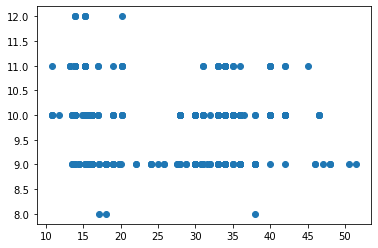

In [36]:
price = new_pumpkins.Price
month = new_pumpkins.Month
plt.scatter(price, month)
plt.show()

Text(0, 0.5, 'Price')

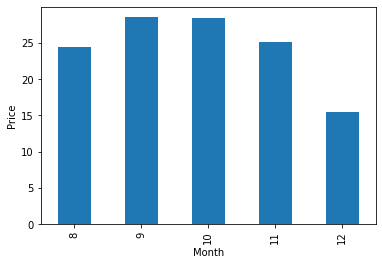

In [41]:
# Bar chart of month vs price
new_pumpkins.groupby(['Month'])['Price'].mean().plot(kind='bar')
plt.ylabel('Price')

Looking at this bar chart we could easily tell that the highest price of pumpkins are on the month of september and october. This is the solution of the problem we set out to solve.